In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('../data/transformed_data.csv')  # Replace with your actual dataset file

# Separate features and target
X = df.drop(columns=['target_column'])  # Replace 'target_column' with the actual column name
y = df['target_column']  # Replace 'target_column' with the actual column name

# Verify shapes before splitting
print("Shape of X:", X.shape)  # Should print (95662, 40)
print("Shape of y:", y.shape)  # Should print (95662,)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes after splitting
print("Shape of X_train:", X_train.shape)  # Should print (76529, 40)
print("Shape of X_test:", X_test.shape)  # Should print (19133, 40)
print("Shape of y_train:", y_train.shape)  # Should print (76529,)
print("Shape of y_test:", y_test.shape)  # Should print (19133,)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify shapes after scaling
print("Shape of X_train_scaled:", X_train_scaled.shape)  # Should print (76529, 40)
print("Shape of X_test_scaled:", X_test_scaled.shape)  # Should print (19133,)

# At this point, you can proceed with your model training


KeyError: "['target_column'] not found in axis"

In [3]:
import pandas as pd
df = pd.read_csv('../data/transformed_data.csv') 

In [4]:
# Check the column names of your dataset
print(df.columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProductId', 'TransactionStartTime',
       'FraudResult', 'log_amount', 'Amount_capped', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Weekday', 'Transaction_Month',
       'ProductCategory_movies', 'ProductCategory_other',
       'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill',
       'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2',
       'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5',
       'ProviderId_ProviderId_1', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'Amount_to_Value_Ratio', 'PricingStrategy_1', 'PricingStrategy_2',
       'PricingStrategy_4', 'ProductCategory_airtime_True',
       'ProductCategory_data_bundles_True',
       'ProductCategory_financial_services_Tru

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/transformed_data.csv')  # Adjust the path if needed

# Use 'FraudResult' as the target column
X = df.drop(columns=['FraudResult'])  # Features
y = df['FraudResult']  # Target

# Verify shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (95662, 39)
Shape of y: (95662,)


In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (76529, 39)
X_test shape: (19133, 39)
y_train shape: (76529,)
y_test shape: (19133,)


In [12]:
import numpy as np

# Drop non-numeric columns such as TransactionId, CustomerId, etc.
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Alternatively, you can drop specific columns you know are non-numeric
# X_train = X_train.drop(['TransactionId', 'CustomerId'], axis=1)
# X_test = X_test.drop(['TransactionId', 'CustomerId'], axis=1)


In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the numeric training data and transform
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test_numeric)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9997386714054252
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.90      0.97      0.93        36

    accuracy                           1.00     19133
   macro avg       0.95      0.99      0.97     19133
weighted avg       1.00      1.00      1.00     19133



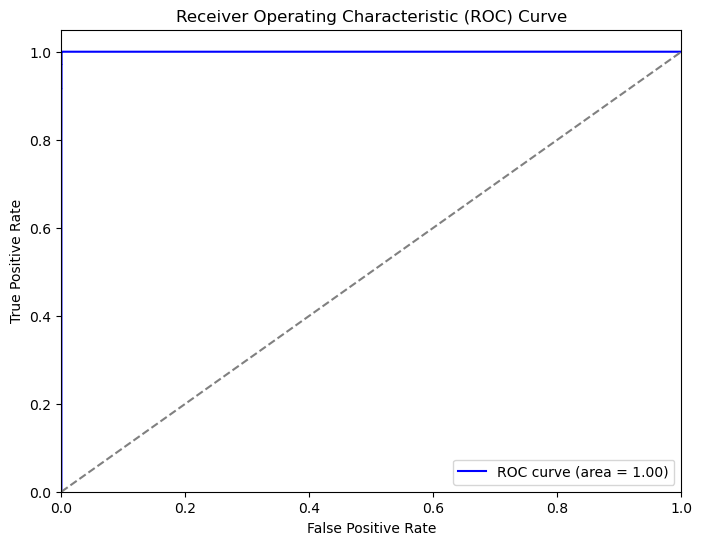

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:,1])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


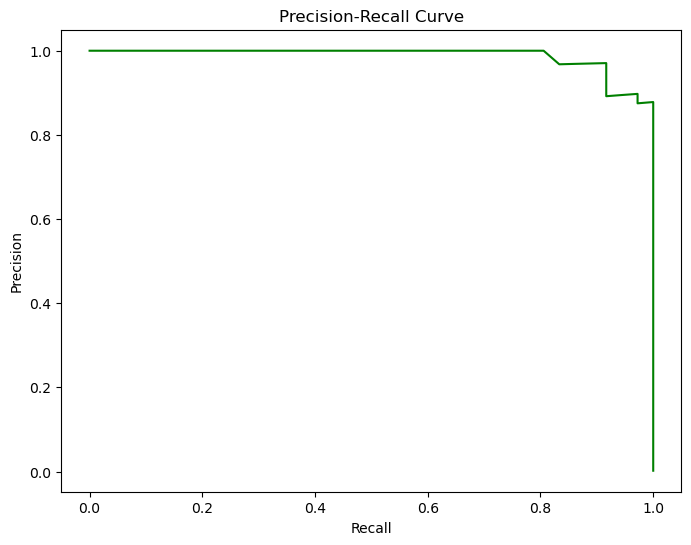

In [17]:
from sklearn.metrics import precision_recall_curve

# Get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, rf_model.predict_proba(X_test_scaled)[:,1])

# Plot the Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


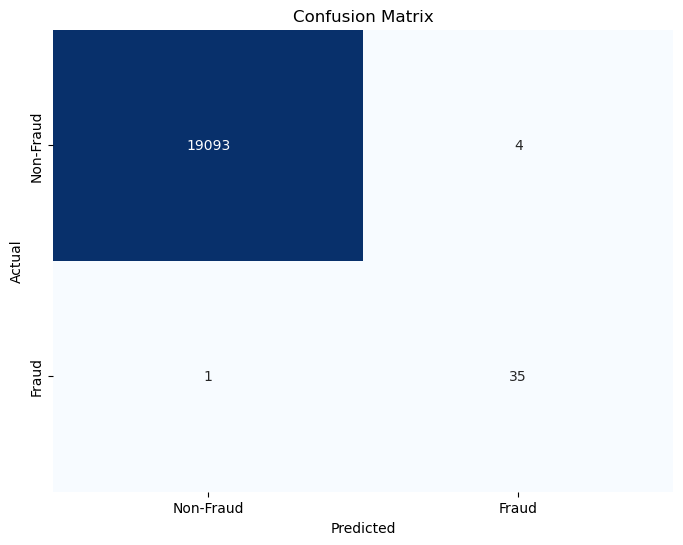

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for better visualization
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [19]:
import joblib

# Save the model to a file
joblib.dump(rf_model, '../model/random_forest_model.joblib')


['../model/random_forest_model.joblib']

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Instantiate the model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb}')
print('Classification Report:')
print(classification_report(y_test, y_pred_gb))


Accuracy: 0.9997909371243402
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.94      0.94      0.94        36

    accuracy                           1.00     19133
   macro avg       0.97      0.97      0.97     19133
weighted avg       1.00      1.00      1.00     19133



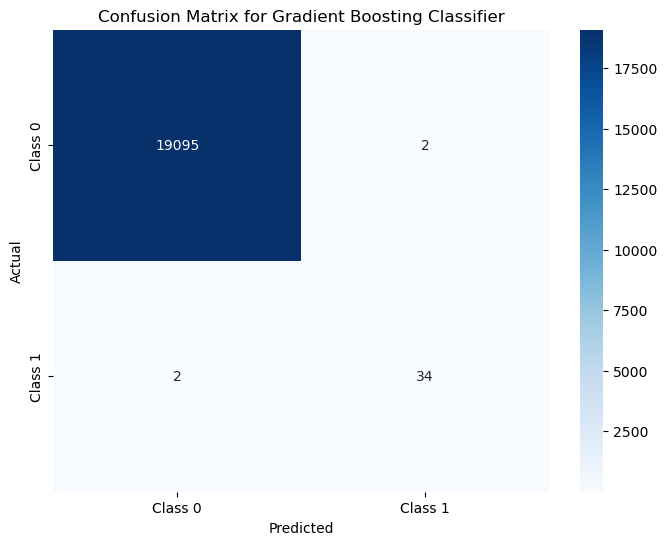

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


In [23]:
joblib.dump(gb_model, '../model/gradient_boosting_model.joblib')

['../model/gradient_boosting_model.joblib']

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


Logistic Regression Accuracy: 0.9982752312758062
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.58      0.31      0.40        36

    accuracy                           1.00     19133
   macro avg       0.79      0.65      0.70     19133
weighted avg       1.00      1.00      1.00     19133



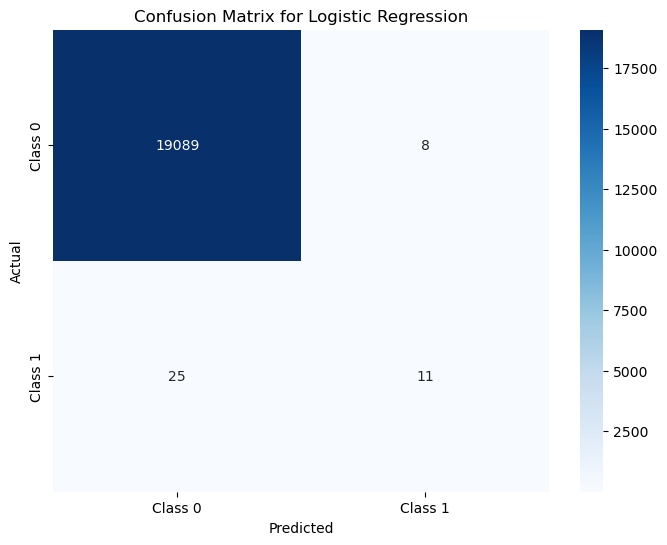

['../model/logistic_regression_model.joblib']

In [25]:
# Instantiate the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print('Classification Report:')
print(classification_report(y_test, y_pred_logistic))

# Plot confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Save the model
joblib.dump(logistic_model, '../model/logistic_regression_model.joblib')
